<a href="https://colab.research.google.com/github/SungjooHwang/ICTclass/blob/main/Ex03_1_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [21]:
# Load data
data = pd.read_csv('Ex03_1_Data.csv', header=None)
X = data.iloc[:, 0:2].values  # Exam scores
y = data.iloc[:, 2].values    # Labels (0 or 1)

In [22]:
data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [23]:
# Plot data
def plot_data(X, y):
    pos = y == 1
    neg = y == 0
    plt.scatter(X[pos, 0], X[pos, 1], c='k', marker='+', label='Admitted')
    plt.scatter(X[neg, 0], X[neg, 1], c='y', edgecolors='k', marker='o', label='Not admitted')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend()

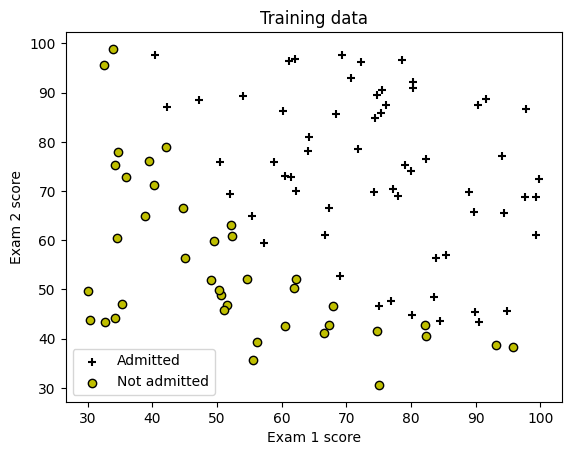

In [24]:
plot_data(X, y)
plt.title('Training data')
plt.show()

In [10]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function and gradient for logistic regression
def cost_function(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)

    cost = -(1/m) * (y @ np.log(h) + (1 - y) @ np.log(1 - h))

    grad = (1/m) * (X.T @ (h - y))

    return cost, grad

In [25]:
# Add intercept term (bias) to the input features
m = X.shape[0]  # number of training examples
X = np.hstack([np.ones((m, 1)), X])  # add a column of ones to X as the first column (bias term)

# Initialize theta parameters to zeros (including bias term)
initial_theta = np.zeros(X.shape[1])  # e.g., [0, 0, 0] for 2 features + bias

In [26]:
# Find the optimal theta that minimizes the cost_function
result = minimize(fun=lambda t: cost_function(t, X, y)[0],  # pass only the cost (objective function)
                  x0=initial_theta,                         # initial value for theta
                  jac=lambda t: cost_function(t, X, y)[1],  # pass the gradient (Jacobian)
                  method='BFGS',                            # optimization algorithm (quasi-Newton method)
                  options={'maxiter': 400, 'disp': True})   # maximum iterations and display optimization progress


Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 23
         Function evaluations: 31
         Gradient evaluations: 31


/tmp/ipython-input-403657911.py:10: RuntimeWarning: divide by zero encountered in log
  cost = -(1/m) * (y @ np.log(h) + (1 - y) @ np.log(1 - h))
/tmp/ipython-input-403657911.py:10: RuntimeWarning: invalid value encountered in matmul
  cost = -(1/m) * (y @ np.log(h) + (1 - y) @ np.log(1 - h))


In [27]:
theta = result.x  # optimized parameters (theta) returned by the minimization

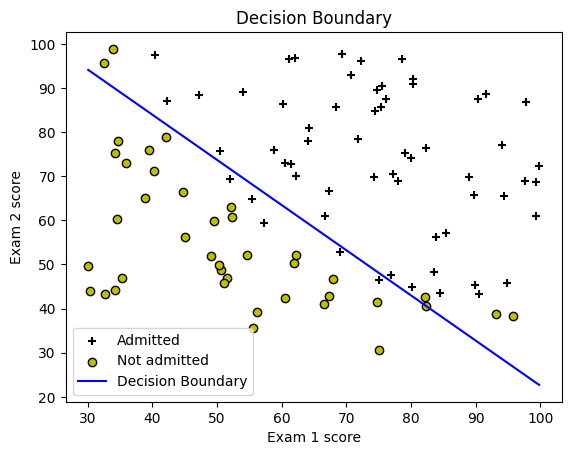

In [30]:
def plot_decision_boundary(theta, X, y):
    # Create a new figure and plot the training data (excluding the bias column)
    plt.figure()
    plot_data(X[:, 1:], y)  # X includes bias column at index 0, so we exclude it here

    # Generate values along the x-axis (Exam 1 scores)
    x1_vals = np.array([X[:, 1].min(), X[:, 1].max()])

    # Compute the corresponding y-axis values (Exam 2 scores) using the decision boundary formula
    # From hypothesis: theta0 + theta1*x1 + theta2*x2 = 0 --> x2 = -(theta0 + theta1*x1) / theta2
    x2_vals = -(theta[0] + theta[1] * x1_vals) / theta[2]

    # Plot the decision boundary line
    plt.plot(x1_vals, x2_vals, 'b-', label='Decision Boundary')

    # Add axis labels and legend
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend()
    plt.title('Decision Boundary')
    plt.show()

plot_decision_boundary(theta, X, y)

In [31]:
# Predict function using learned theta
def predict(theta, X):
    probs = sigmoid(X @ theta)            # compute predicted probabilities
    return probs >= 0.5                   # return True (1) if prob ≥ 0.5, else False (0)

# Predict admission probability for a student with exam scores 45 and 85
example = np.array([1, 45, 85])           # include bias term as the first element
prob = sigmoid(example @ theta)           # compute probability using the learned theta
print(f"\n[Prediction] Admission probability for scores 45 and 85: {prob:.4f}")

# Evaluate prediction accuracy on the entire training set
predictions = predict(theta, X)           # get predicted labels for all training examples
accuracy = np.mean(predictions == y) * 100  # compare with actual labels and compute accuracy
print(f"[Accuracy] Training set accuracy: {accuracy:.2f}%")


[Prediction] Admission probability for scores 45 and 85: 0.7763
[Accuracy] Training set accuracy: 89.00%
